In [6]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from vgg_models.vgg import vgg13_bn

# Set device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformation for the input data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

# Load the CIFAR-10 test dataset
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

# Load a pretrained ResNet model (you can choose a different model)
pretrained_model = vgg13_bn(pretrained=True)
pretrained_model = pretrained_model.to(device)
pretrained_model.eval()

correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:

        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = pretrained_model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Update counts
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f'Accuracy on CIFAR-10: {100 * accuracy:.2f}%')


Files already downloaded and verified
Accuracy on CIFAR-10: 94.21%


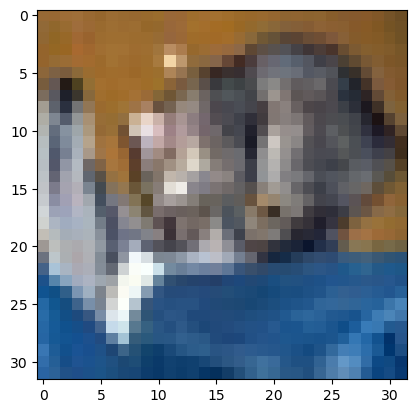

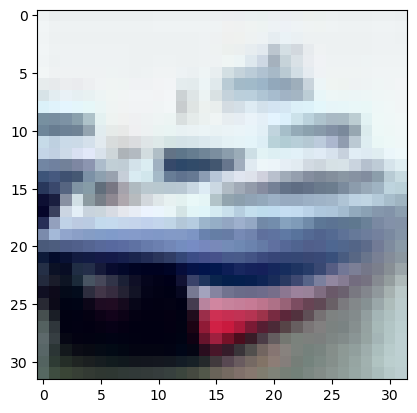

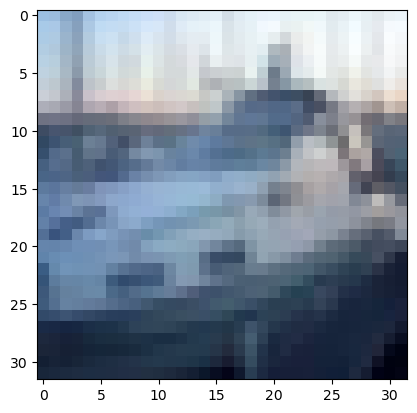

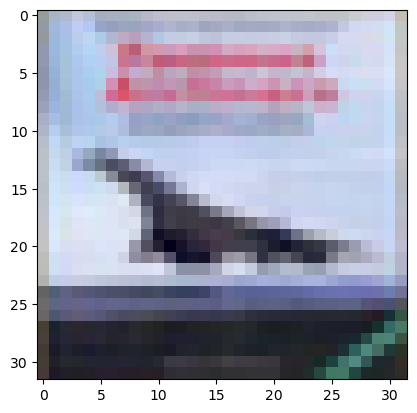

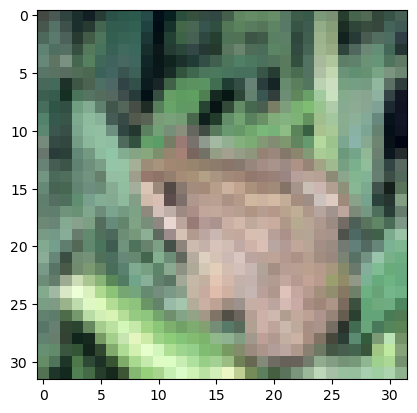

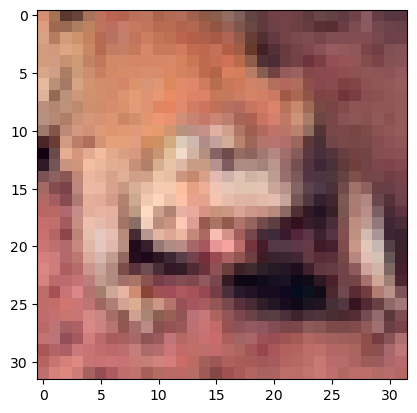

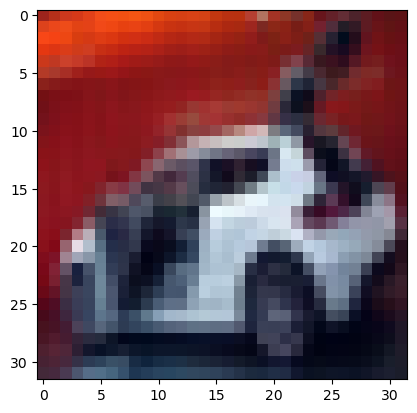

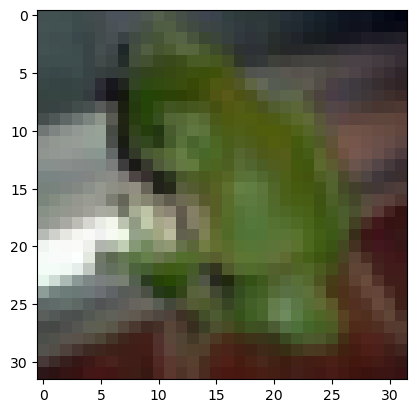

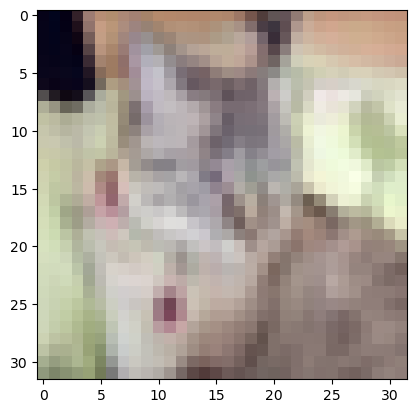

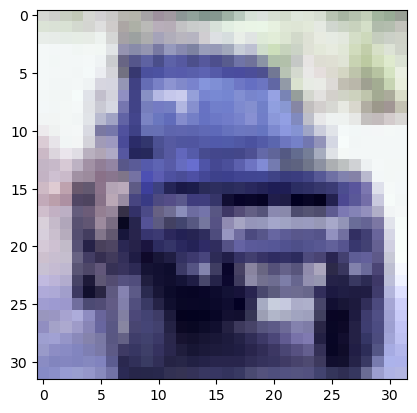

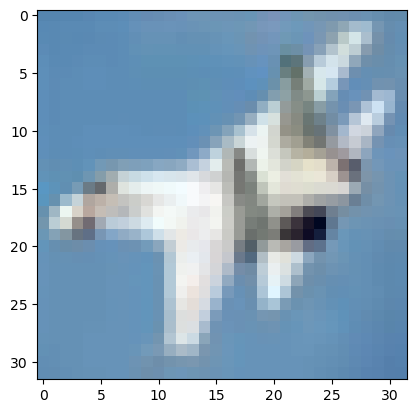

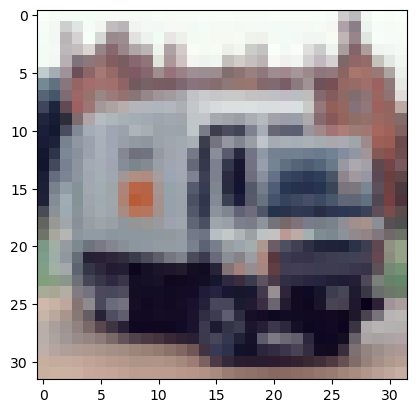

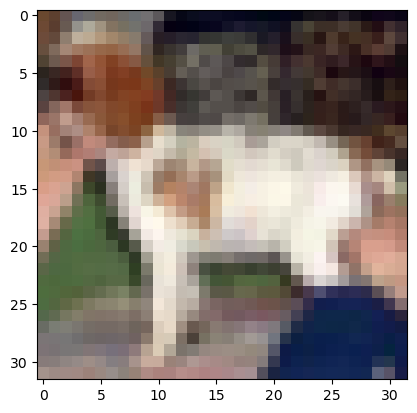

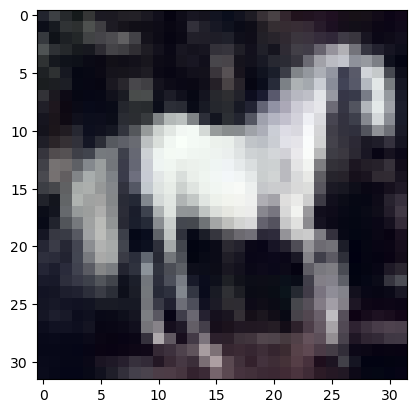

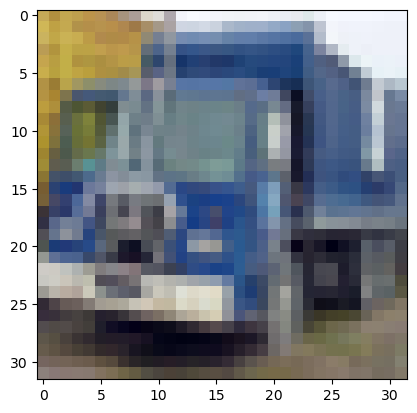

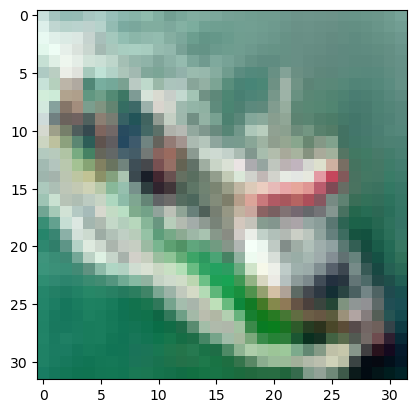

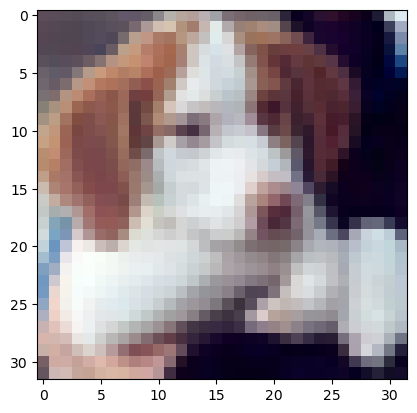

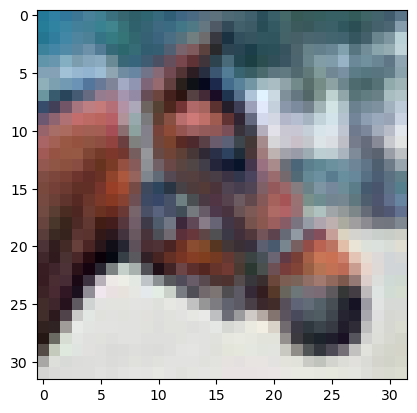

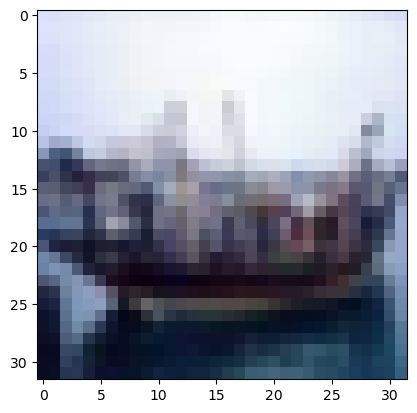

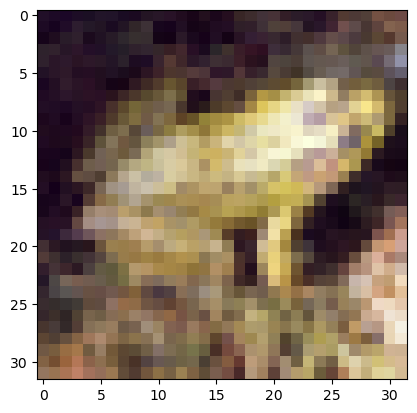

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def norm_01(array):
    return(array-np.min(array))/(np.max(array)-np.min(array))

def show_im(batch):
    img = batch.reshape(3,32,32).permute(1,2,0)
    img_np = img.detach().numpy()
    plt.imshow(norm_01(img_np))

for i in range(20):
    show_im(test_dataset[i][0])
    plt.show()

In [16]:
from PIL import Image
import requests

url = 'https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog10.png'
image = Image.open(requests.get(url, stream=True).raw)

pix = np.array(image)
print(pix.shape)
image.show()

(32, 32, 3)
